In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

In [0]:
data= pd.read_csv('reviews.csv')
data.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...
5,2318,168472530,2017-07-09,118518041,Kelly,Casa Madrona was a fabulous house and location...
6,2318,174022018,2017-07-24,16683170,John & Tiffany,We stayed at Megan's place for 9 days with 5 k...
7,2318,196029049,2017-09-21,67403539,Amanda,"Lovely, light and beautiful home in a great lo..."
8,2318,209975438,2017-11-06,60787734,Alicia,Megan's house is incredibly comfortable and st...
9,2318,213368742,2017-11-20,26478142,Karen,Megan was very accommodating and their home wa...


In [0]:
Sentiment_Polarity=[]
for index,row in data.iterrows():
    cleaned_comment=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", str(row['comments'])).split())
    blob = TextBlob(cleaned_comment)
    Sentiment_Polarity.append(blob.sentiment.polarity)

In [0]:
data['Sentiment_Polarity']=pd.Series(Sentiment_Polarity)
data.assign(Mean_Sentiment_Polarity=data.listing_id.mean())
data.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,Sentiment_Polarity
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.,0.500000
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an...",0.378835
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...,0.493333
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s...",0.470333
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...,0.380000
5,2318,168472530,2017-07-09,118518041,Kelly,Casa Madrona was a fabulous house and location...,0.258333
6,2318,174022018,2017-07-24,16683170,John & Tiffany,We stayed at Megan's place for 9 days with 5 k...,0.462857
7,2318,196029049,2017-09-21,67403539,Amanda,"Lovely, light and beautiful home in a great lo...",0.471277
8,2318,209975438,2017-11-06,60787734,Alicia,Megan's house is incredibly comfortable and st...,0.525000
9,2318,213368742,2017-11-20,26478142,Karen,Megan was very accommodating and their home wa...,0.656667


In [0]:
Mean_Sentiment_Polarity=data.groupby('listing_id').mean().Sentiment_Polarity.rename_axis('listing_id').reset_index(name='Mean_Sentiment_Polarity')
Mean_Sentiment_Polarity.head(10)

,listing_id,Mean_Sentiment_Polarity
0,2318,0.483347
1,3335,0.337037
2,4291,0.334691
3,5682,0.353886
4,6606,0.356150
5,9419,0.341508
6,9460,0.370264
7,9531,0.413972
8,9534,0.385315
9,9596,0.401129


In [0]:

Total_Reviews_per_listing=pd.DataFrame(data['listing_id'].value_counts().rename_axis('listing_id').reset_index(name='Total_Reviews_per_listing'))
Total_Reviews_per_listing.head(10)

,listing_id,Total_Reviews_per_listing
0,365550,716
1,208356,703
2,25002,692
3,3861673,657
4,1758935,513
5,20927,499
6,2686374,493
7,794633,479
8,1279660,477
9,11398085,470


In [0]:
summary_review = pd.merge(Mean_Sentiment_Polarity, Total_Reviews_per_listing, on = 'listing_id')
summary_review.head(10)

,listing_id,Mean_Sentiment_Polarity,Total_Reviews_per_listing
0,2318,0.483347,21
1,3335,0.337037,1
2,4291,0.334691,63
3,5682,0.353886,462
4,6606,0.356150,134
5,9419,0.341508,130
6,9460,0.370264,404
7,9531,0.413972,36
8,9534,0.385315,36
9,9596,0.401129,76


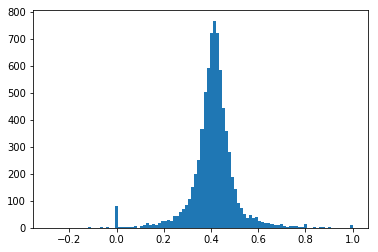

In [0]:
plt.hist([summary_review.Mean_Sentiment_Polarity],bins=100)
plt.show()

In [0]:
export_csv = summary_review.to_csv ('summary_review.csv', index = None, header=True)